In [1]:
import pandas as pd
import numpy as np
import wordcloud as wc 
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

In [2]:
# Importing in each cell because of the kernel restarts.
import scrapy
from scrapy.crawler import CrawlerProcess
from scrapy.selector import HtmlXPathSelector
from IPython.display import clear_output

class ESSpider(scrapy.Spider):
    # Naming the spider is important if you are running more than one spider of
    # this class simultaneously.
    name = "ESS"
    
    start_urls = [
        'https://www.biorxiv.org/search/cognition%20numresults%3A100%20sort%3Arelevance-rank',
    ]
    # Use XPath to parse the response we get.
    def parse(self, response):

        for title in response.xpath('//a/span[@class="highwire-cite-title"]/text()'):
            yield {'title': title.extract()}
        
        nextPage = response.xpath('//*[@class="pager-next first last odd"]/a/@href')
        nextP = nextPage.extract()[0]
        if nextPage:
            base = 'https://www.biorxiv.org/'
            combine  = base + nextP
            clear_output()
            print (combine)
            request = scrapy.Request(url=combine)
            yield request
            
            
process = CrawlerProcess({
    'FEED_FORMAT': 'json',
    'FEED_URI': 'PaperTitles.json',
    # Note that because we are doing API queries, the robots.txt file doesn't apply to us.
    'ROBOTSTXT_OBEY': False,
    'USER_AGENT': 'ThinkfulDataScienceBootcampCrawler (thinkful.com)',
    'AUTOTHROTTLE_ENABLED': True,
    'HTTPCACHE_ENABLED': True,
    'LOG_ENABLED': False,
    'CLOSESPIDER_PAGECOUNT' : 30
})

# Start the crawler with our spider.
process.crawl(ESSpider)
process.start()
print('Success!')

https://www.biorxiv.org//search/cognition%20numresults%3A100%20sort%3Arelevance-rank?page=30
Success!


In [3]:
titles = pd.read_json('PaperTitles.json', orient='records')
print (titles.shape)
print (titles.tail())

(3026, 1)
                                                  title
3021  Perceptual decisions result from the continuou...
3022  Sex- and Context-dependent Effects of Oxytocin...
3023  Mutant p63 affects epidermal cell identity thr...
3024  VideoTagger: User-Friendly Software for Annota...
3025  Forecasting autism gene discovery with machine...


In [16]:
# Then define stop words to use...we'll include some "typical" brain words
our_stop_words = list(ENGLISH_STOP_WORDS) + ['effect'
                                             ,'network'
                                             ,'neural'
                                             ,'human'
                                             ,'cognitive'
                                             ,'brain'
                                             ,'associated'
                                             ,'based'
                                             ,'networks'
                                             ,'using'
                                             ,'related'
                                             ,'difference'
                                             ,'functional'
                                             ,'effects'
                                             ,'change'
                                             ,'cognition'
                                             ,'measure'
                                             ,'non'
                                             ,'cortical'
                                             ,'evidence'
                                             ,'does'
                                             ,'model'
                                             ]

In [22]:
# This function takes a buch of dummy arguments and returns random colors
def color_func(word=None, font_size=None, position=None,
               orientation=None, font_path=None, random_state=None):
    rand = np.clip(np.random.rand(), .2, None)
    cols = np.array(plt.cm.rainbow(rand)[:3])
    cols = cols * 255
    return 'rgb({:.0f}, {:.0f}, {:.0f})'.format(*cols)

In [23]:
titleWords = titles['title'].values
titleWords = ' '.join(titleWords)

In [24]:
cloud = wc.WordCloud(stopwords=our_stop_words,
                     color_func=color_func, 
                     width=3000, height=1500)
cloud.generate_from_text(titleWords)


im = cloud.to_array()


In [25]:
plt.figure(figsize=(20,10))
plt.imshow(cloud)
plt.axis("off")

(-0.5, 2999.5, 1499.5, -0.5)

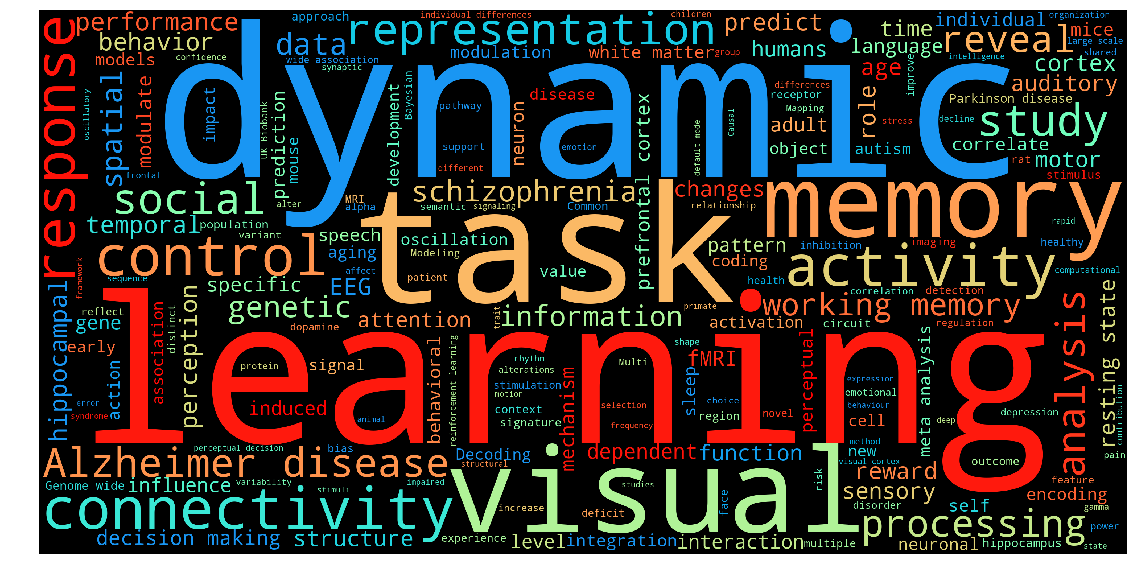

In [26]:
plt.show()